In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
sys.path.append('../')
import os
import curvedsky as cs

In [2]:
%load_ext autoreload
%autoreload 2
from quest import Reconstruction
from plotstat import recStat

In [3]:
rec_nofg = Reconstruction.from_ini('LB_FG0.ini')
rec_fg1 = Reconstruction.from_ini('LB_FG1.ini')
rec_fg2 = Reconstruction.from_ini('LB_FG2.ini')
rec_fg3 = Reconstruction.from_ini('LB_FG2_p9.ini')

DATABASE: loaded
SIMUALATION object with out FG: Loaded
FILTERING object with out FG: Loaded
QUEST object with out FG: Loaded
DATABASE: loaded
SIMUALATION object with  FG: Loaded
FILTERING object with  FG: Loaded
QUEST object with  FG: Loaded
DATABASE: loaded
SIMUALATION object with  FG: Loaded
FILTERING object with  FG: Loaded
QUEST object with  FG: Loaded
DATABASE: loaded
SIMUALATION object with  FG: Loaded
FILTERING object with  FG: Loaded
QUEST object with  FG: Loaded


In [4]:
mystat = recStat(rec_nofg=rec_nofg,rec_fg1=rec_fg1,rec_fg2=rec_fg2,rec_fg3=rec_fg3)

../plotstat.py:315: RuntimeWarning: invalid value encountered in true_divide
  data['NOFG-MCN0'] = rec_nofg.Lfac*(rec_nofg.RDN0_mean()/rec_nofg.response_mean()**2 )
../plotstat.py:316: RuntimeWarning: invalid value encountered in true_divide
  data['fg1-MCN0'] = rec_fg1.Lfac*(rec_fg1.RDN0_mean()/rec_fg1.response_mean()**2 )
../plotstat.py:317: RuntimeWarning: invalid value encountered in true_divide
  data['fg2-MCN0'] = rec_fg2.Lfac*(rec_fg2.RDN0_mean()/rec_fg2.response_mean()**2 )
../plotstat.py:318: RuntimeWarning: invalid value encountered in true_divide
  data['fg3-MCN0'] = rec_fg3.Lfac*(rec_fg3.RDN0_mean()/rec_fg3.response_mean()**2 )
../plotstat.py:319: RuntimeWarning: invalid value encountered in true_divide
  data['NOFG-MCER'] = rec_fg1.Lfac*(rec_nofg.MCN0()/rec_nofg.response_mean()**2 )/100
../plotstat.py:320: RuntimeWarning: invalid value encountered in true_divide
  data['fg2-MCER'] = rec_fg1.Lfac*(rec_fg2.MCN0()/rec_fg2.response_mean()**2 )/100


Data Saved to file


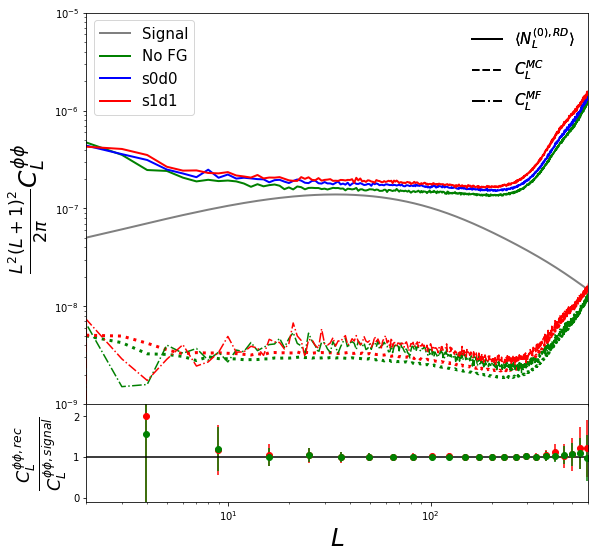

In [12]:
mystat.plot_fg_impactNew(planck=False,logy=True)

Input Map Loaded from file
Output Map Loaded from file


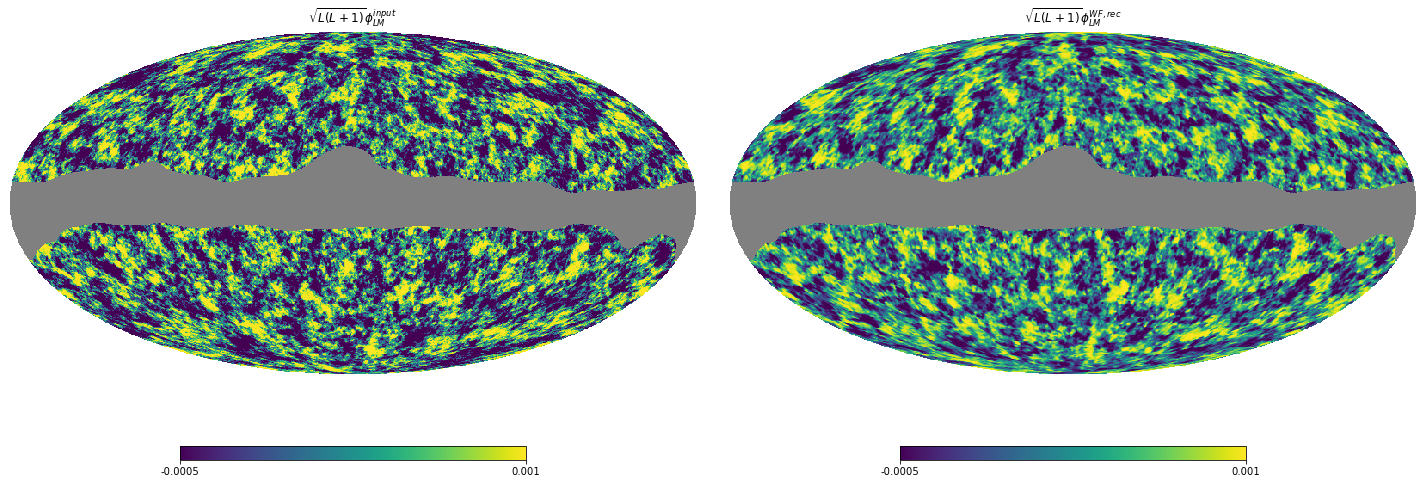

In [6]:
mystat.plot_map_dif()

Data Loaded from file


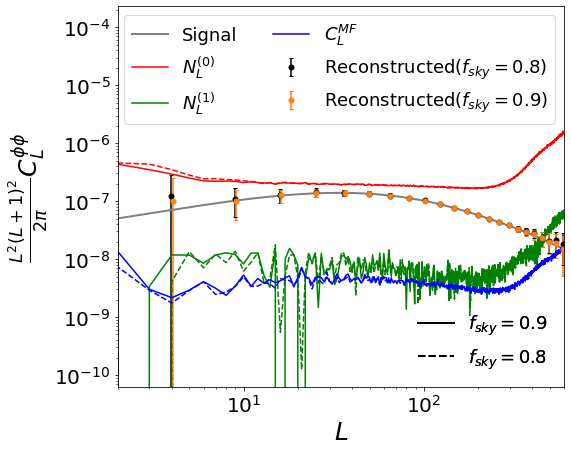

In [27]:
mystat.plot_qcl_stat()

In [8]:
mystat.SNR_impact()

SNR Loaded from file
SNR NOFG: 45.12
SNR FG1: 40.88 decreased by 9.39 %
SNR FG2: 40.03 decreased by 11.28 %


Data Loaded from file


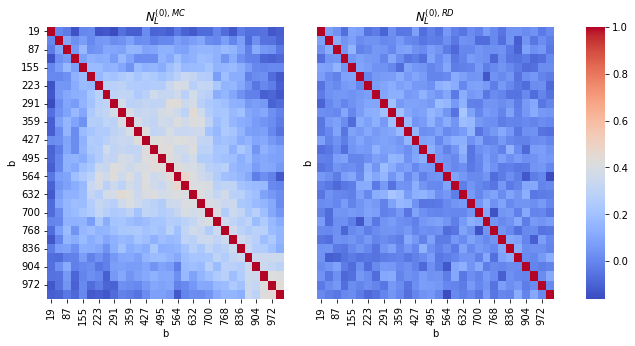

In [9]:
mystat.plot_bin_corr_comp(which=0)

In [4]:
lfac = rec_nofg.Lfac
cl_pp = rec_nofg.cl_pp
B = rec_nofg.B
CL_arr_nofg = rec_nofg.get_qcl_wR_stat(n=400,n1=True,rdn0=True)
CL_arr_fg1 = rec_fg1.get_qcl_wR_stat(n=400,n1=True,rdn0=True)
CL_arr_fg2 = rec_fg2.get_qcl_wR_stat(n=400,n1=True,rdn0=True)
CL_arr_fg3 = rec_fg3.get_qcl_wR_stat(n=400,n1=True,rdn0=True)
fid = rec_nofg.bin_cell(cl_pp*lfac)

Text(0, 0.5, '$C_L^{\\phi \\phi}$')

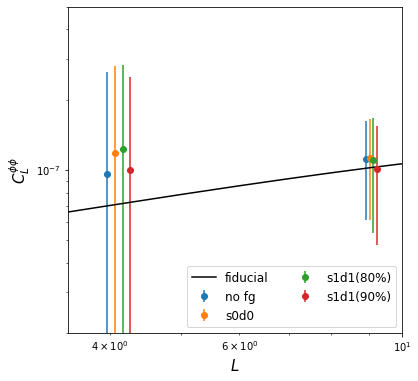

In [69]:
plt.figure(figsize=(6,6))
plt.loglog(cl_pp*lfac,'k',label='fiducial')
plt.errorbar(B, CL_arr_nofg.mean(0), yerr=CL_arr_nofg.std(0), fmt='o',label='no fg')
plt.errorbar(B+.1, CL_arr_fg1.mean(0), yerr=CL_arr_fg1.std(0), fmt='o',label='s0d0')
plt.errorbar(B+.2, CL_arr_fg2.mean(0), yerr=CL_arr_fg2.std(0), fmt='o',label = 's1d1(80%)')
plt.errorbar(B+.3, CL_arr_fg3.mean(0), yerr=CL_arr_fg3.std(0), fmt='o',label = 's1d1(90%)')
plt.xlim(3.5,10)
plt.ylim(2e-8,5e-7)
plt.legend(fontsize=12,loc='lower right',ncol=2)
plt.xlabel(r'$L$',fontsize=15)
plt.ylabel(r'$C_L^{\phi \phi}$',fontsize=15)

Text(0, 0.5, '$C_L^{\\phi \\phi}/C_L^{\\phi \\phi, \\rm signal}$')

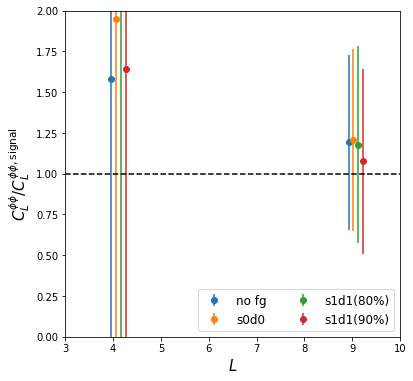

In [63]:
plt.figure(figsize=(6,6))
plt.axhline(1,ls='--',color='k')
plt.errorbar(B, CL_arr_nofg.mean(0)/fid, yerr=CL_arr_nofg.std(0)/fid, fmt='o',label='no fg')
plt.errorbar(B+.1, CL_arr_fg1.mean(0)/fid, yerr=CL_arr_fg1.std(0)/fid, fmt='o',label='s0d0')
plt.errorbar(B+.2, CL_arr_fg2.mean(0)/fid, yerr=CL_arr_fg2.std(0)/fid, fmt='o',label = 's1d1(80%)')
plt.errorbar(B+.3, CL_arr_fg3.mean(0)/fid, yerr=CL_arr_fg3.std(0)/fid, fmt='o',label = 's1d1(90%)')
plt.xlim(3,10)
plt.ylim(0,2)
plt.legend(fontsize=12,loc='lower right',ncol=2)
plt.xlabel(r'$L$',fontsize=15)
plt.ylabel(r'$C_L^{\phi \phi}/C_L^{\phi \phi, \rm signal}$',fontsize=15)

In [7]:
(CL_arr_fg3.mean(axis=0)[0]- fid[0])/CL_arr_fg3.std(axis=0)[0]

0.2602892561352748

In [8]:
(CL_arr_fg3.mean(axis=0)[1]- fid[1])/CL_arr_fg3.std(axis=0)[1]

0.13436556224782853

In [65]:
CL_arr_fg3.mean(0)[1]

1.0068890096800037e-07

In [17]:
.005/0.0234

0.21367521367521367

In [15]:
1/42.71

0.023413720440177945